## Download training and test images

In [7]:
!pip install autopep8

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip --no-check-certificate

### Unzip the training Data

In [4]:
import zipfile

zipfile_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zipfile_ref.extractall()
zipfile_ref.close()

### Visual the image shape before we reprocess it

image.shape = (382, 512, 3)


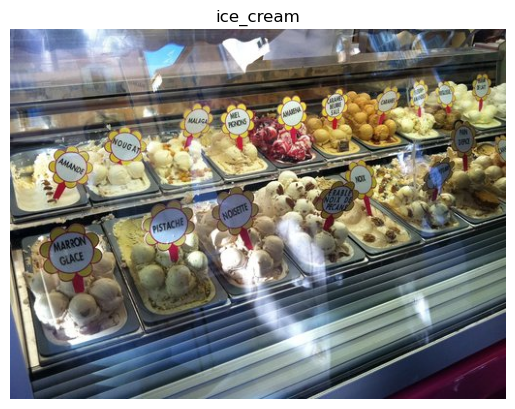

In [15]:
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

def load_image(folder_dir, classname):
    target_dir = folder_dir + classname
    image_location = folder_dir + classname + "/" + random.sample(os.listdir(target_dir), 1)[0]
    image = mpimg.imread(image_location)
    plt.imshow(image)
    plt.axis("off")
    plt.title(classname)
    print(f"image.shape = {image.shape}")

load_image(train_dir, random.sample(os.listdir(train_dir), 1)[0])

## Preprocessing image batches and Creating Model

In [28]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir, image_size=(255,255), batch_size=32)
test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir, image_size=(255,255), batch_size=32)
train_data_repeat = train_data.repeat().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data_repeat = train_data.repeat().prefetch(buffer_size=tf.data.AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(train_data_repeat, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data_repeat, validation_steps=len(train_data))


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Epoch 1/5


2024-11-20 09:36:31.606154: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2024-11-20 09:36:31.739969: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2024-11-20 09:36:31.753667: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81931520 exceeds 10% of free system memory.
2024-11-20 09:36:31.884024: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.
2024-11-20 09:36:32.126348: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24969600 exceeds 10% of free system memory.


  9/235 ━━━━━━━━━━━━━━━━━━━━ 11:27 3s/step - accuracy: 0.0923 - loss: 2.3346

KeyboardInterrupt: 